In [1]:
# import libriaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 6)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# EDA

In [7]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
data=iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',]]

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaler=scaler.fit_transform(data)

In [11]:
iris_new=pd.DataFrame(data_scaler)
iris_new.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [12]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [13]:
kmeans=cluster.KMeans(n_clusters=4,init="k-means++")
kmeans=kmeans.fit(iris_new)

In [14]:
kmeans.labels_

array([3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 0, 3, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1])

In [15]:
kmeans.cluster_centers_

array([[-0.57445998,  1.97546931, -1.27128385, -1.20173037],
       [ 1.06889068,  0.06560955,  0.9690362 ,  1.00197871],
       [-0.07723421, -0.92778421,  0.32291983,  0.23786769],
       [-1.16921537,  0.44416861, -1.31668183, -1.27389017]])

In [16]:
## Elbow method
from scipy.spatial.distance import cdist
K=range(1,10)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(iris_new)
    wss.append(sum(np.min(cdist(iris_new, kmeans.cluster_centers_, 'euclidean'), 
                                      axis=1)) / iris_new.shape[0])

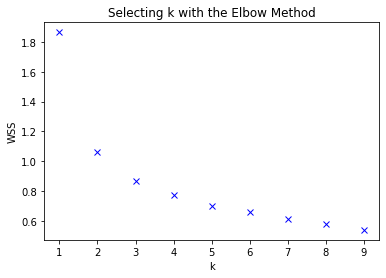

In [17]:
plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [20]:
import sklearn.metrics as metrics
labels=cluster.KMeans(n_clusters=3,random_state=0).fit(iris_new).labels_

In [21]:
metrics.silhouette_score(iris_new,labels,metric="euclidean",sample_size=10000,random_state=200)

0.45897178670187183

In [26]:
for i in range(2,6):
    labels=cluster.KMeans(n_clusters=i,random_state=0).fit(iris_new).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(iris_new,labels,metric="euclidean",
                                 sample_size=15,random_state=0)))

Silhoutte score for k= 2 is 0.6346540339714365
Silhoutte score for k= 3 is 0.29973560386674936
Silhoutte score for k= 4 is 0.29973560386674936
Silhoutte score for k= 5 is 0.34245422031504813


In [29]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=10)
kmeans.fit(iris_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [33]:
df=pd.DataFrame(kmeans.labels_)
df.rename(columns={0:"lable"},inplace=True)
df

,lable
0,1
1,1
2,1
3,1
4,1
...,...
145,0
146,2
147,0
148,0


In [ ]:
iris['label']=df['']